In [26]:
import pandas as pd
import numpy as np
from ISLP import load_data, confusion_table
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from ISLP.models import ModelSpec as MS
from sklearn.metrics import (accuracy_score,
                             log_loss)
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

from RockiesDashboard import fig_attendance

In [4]:
OJ = load_data('OJ')
OJ

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7,1.86,2.09,0.10,0.00,0,0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0
1066,CH,256,7,1.86,2.18,0.00,0.00,0,0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1067,MM,257,7,1.86,2.18,0.00,0.00,0,0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0
1068,CH,261,7,1.86,2.13,0.00,0.24,0,0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0


In [12]:
model = MS(OJ.columns.drop(['Purchase', 'Store7']), intercept = False)
D = model.fit_transform(OJ)
feature_names = list(D.columns)
X = np.asarray(D)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 800,
    random_state = 0
)

In [13]:
clf = DTC(criterion = 'entropy',
          random_state = 0)
result = clf.fit(X_train,y_train)

In [16]:
training_error = 1 - accuracy_score(y_train, clf.predict(X_train))
training_error

0.008750000000000036

Our training error rate is very low at 0.87%

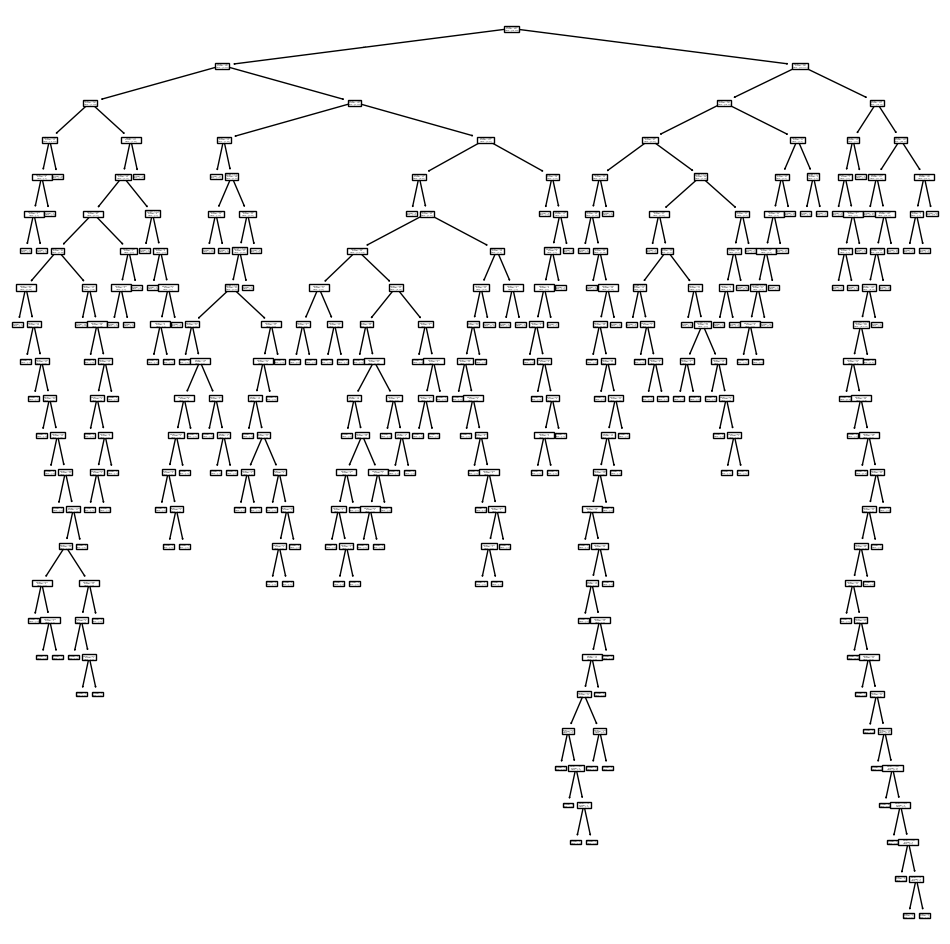

In [18]:
ax = subplots(figsize = (12, 12))[1]
plot_tree(clf, feature_names = feature_names, ax = ax);

In [19]:
clf.tree_.n_leaves

np.int64(171)

We have 171 terminal nodes in our tree.

In [20]:
print(export_text(clf, feature_names = feature_names, show_weights = True))

|--- LoyalCH <= 0.51
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.04
|   |   |   |--- StoreID <= 2.50
|   |   |   |   |--- WeekofPurchase <= 269.50
|   |   |   |   |   |--- WeekofPurchase <= 267.50
|   |   |   |   |   |   |--- weights: [0.00, 2.00] class: MM
|   |   |   |   |   |--- WeekofPurchase >  267.50
|   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |--- WeekofPurchase >  269.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: MM
|   |   |   |--- StoreID >  2.50
|   |   |   |   |--- weights: [0.00, 43.00] class: MM
|   |   |--- LoyalCH >  0.04
|   |   |   |--- WeekofPurchase <= 273.50
|   |   |   |   |--- SalePriceCH <= 1.94
|   |   |   |   |   |--- WeekofPurchase <= 263.50
|   |   |   |   |   |   |--- STORE <= 1.50
|   |   |   |   |   |   |   |--- WeekofPurchase <= 228.00
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: CH
|   |   |   |   |   |   |   |--- WeekofPurchase >  228.00
|   |   |   |   |   |   |   |   |--- LoyalCH

Lets take a look at the first terminal node in the previous output. This node was classified as MM. It was obtained by having a LoyalCH < 0.04, StoreID < 2.50, and WeekofPurchase < 267.50.

In [23]:
confusion = confusion_table(clf.predict(X_test), y_test)
confusion

Truth,CH,MM
Predicted,,
CH,126,33
MM,27,84


In [24]:
test_error = (confusion.iloc[0, 1] + confusion.iloc[1, 0])/np.sum(confusion.values)
test_error

np.float64(0.2222222222222222)

The test error is 22.22% which is much higher than our training error.  We must have overfit our tree before.

In [27]:
M = np.zeros(clf.get_depth())
for i in range(1, clf.get_depth() + 1):
    clf1 = DTC(criterion = 'entropy',
               random_state = 0,
               max_depth = i)
    results1 = skm.cross_val_score(clf1, X_train, y_train, cv = 10)
    M[i - 1] = results1.mean()
print('The optimal tree size is: ', M.argmax() + 1)

The optimal tree size is:  3


Text(0, 0.5, 'CV Classification Error')

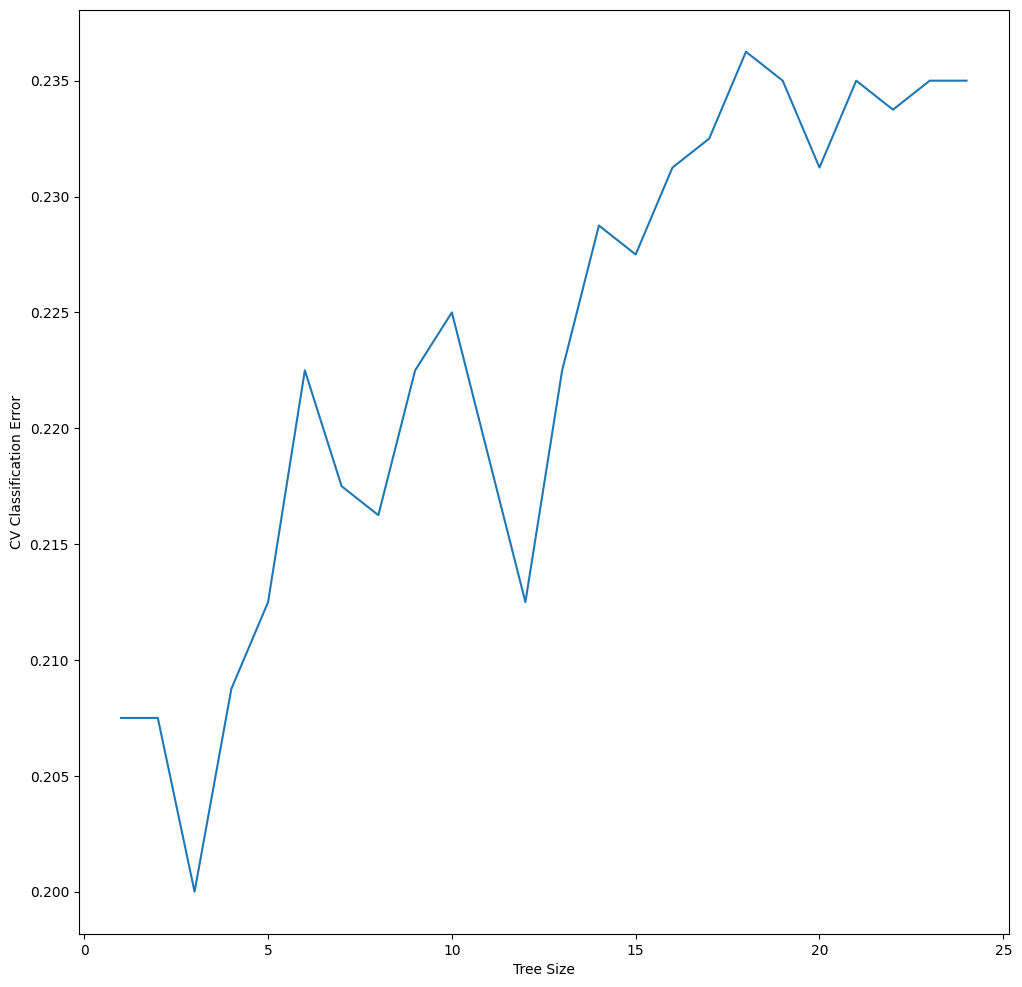

In [30]:
fig, ax = subplots(figsize = (12, 12))
ax.plot(range(1, clf.get_depth() + 1), 1 - M)
ax.set_xlabel('Tree Size')
ax.set_ylabel('CV Classification Error')

Our best tree size is 3

In [31]:
clf_pruned = DTC(criterion = 'entropy',
                 random_state = 0,
                 max_depth = M.argmax() + 1)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(3),
                       random_state=0)

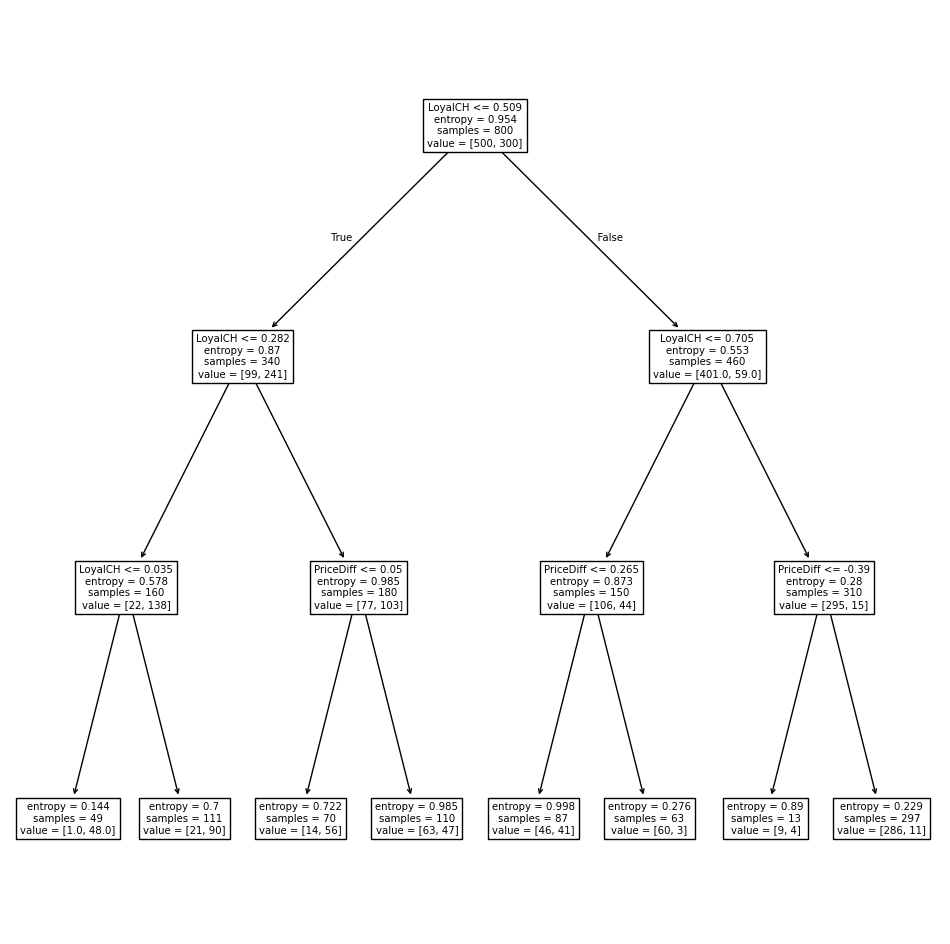

In [32]:
ax = subplots(figsize = (12, 12))[1]
plot_tree(clf_pruned, feature_names = feature_names, ax =ax);

In [33]:
training_error_pruned = 1 - accuracy_score(y_train, clf_pruned.predict(X_train))
training_error_pruned

0.1775

Our training error is 17.75% which is way bigger than our training error with the bigger tree.

In [34]:
test_error_pruned = 1 - accuracy_score(y_test, clf_pruned.predict(X_test))
test_error_pruned

0.18888888888888888

Our test error is 18.88% which is better than the test error obtained with the bigger tree.

In [35]:
Hitters  = load_data('Hitters')